## Park_HeeJi_HW06.ipynb
- Student Name: Hee Ji Park
- Github username : heejipark 
- USC ID: 4090715830
- Contact Email: heejipar@usc.edu

## 1.

### Required libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, auc
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE

### (a) Download the APS Failure data
- Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks. 
The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [2]:
df = pd.read_csv('./../data/aps_failure_training_set.csv', skiprows=20, na_values='na')
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [3]:
test = pd.read_csv('./../data/aps_failure_test_set.csv', skiprows=20, na_values='na')
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


### (b) Data Preparation
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

#### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

When there are missing data, there are several ways to solve this problem.

1. Using <code>dropna</code>
    - Drop rows or columns that only have missing values : This way is to have a column or row that is full of missing values. Such columns or rows are useless so we can drop them.

    - Drop rows or columns that have a missing value : One option is to drop the rows or columns that contain a missing value.

    - Drop rows or columns based on a threshold value : Dropping based on “any” or “all” is not always the best option. We sometimes need to drop rows or columns with “lots of” or “some” missing values. We cannot assign such expressions to the how parameter but Pandas gives us a more accurate way which is the thresh parameter. For instance, “thresh=4” means that the rows that have at least 4 non-missing values will be kept. The other ones will be dropped.


2. Using <code>fillna</code> : The fillna function is used for filling the missing values.
    - Fill with a constant value : We can choose a constant value to be used as a replacement for the missing values.
    - Fill with an aggregated value : Another option is to use an aggregated value such as mean, median, or mode.
    - Replace with the previous or next value : It is possible to replace the missing values in a column with the previous or next value in that column.
    - Fill by using another data frame : We can also pass another data frame to the fillna function. The values in the new data frame will be used to replace the missing values in the current data frame.


<b>Answer : </b>
- I will fill in the blanks with aggregate values, especially mean values.
- In this data, missing values are denoted by "na".
- Generally, we should use this technique to training set only. Remember this rule for a real-world problem, never let your model contains any information about the test set. But for the sake of homework here, you need to do that for the entire dataset. Follow the instruction. Piazza @1121

In [4]:
total = pd.concat([df, test]) # merge train and test dataset to fill the missing value (Piazza @1121)
total

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [5]:
# Use a data imputation technique that fills in the mean of each column.
total.iloc[:,1:] = total.iloc[:,1:].fillna(total.mean(numeric_only=True)) 
total

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [6]:
# Split back into training and test datasets
train = df = total.iloc[0:60000,:]
test = total.iloc[60000:,:]

#### ii. For each of the 170 features, calculate the coefficient of variationCV = s/m, where s is sample standard deviation and m is sample mean.

In [7]:
train2 = train.iloc[:,1:]
cv =  lambda x: np.std(x) / np.mean(x)
var = train2.apply(cv)
var

aa_000      2.450917
ab_000      2.297616
ac_000      2.169604
ad_000    193.922717
ae_000     23.202393
             ...    
ee_007      4.962235
ee_008      3.221680
ee_009      5.626661
ef_000     47.252018
eg_000     40.498585
Length: 170, dtype: float64

#### iii. Plot a correlation matrix for your features using pandas or any other tool.
iv. Pick √170 features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [8]:
FeatureSignificant = pd.DataFrame(list(zip(train.columns[1:], var)), columns=['feature','coefficient']).sort_values(by='coefficient', ascending=False)
FeatureSignificant

,feature,coefficient
122,cs_009,234.451434
91,cf_000,194.351642
109,co_000,194.037536
3,ad_000,193.922717
136,dh_000,115.647498
...,...,...
75,bo_000,0.464007
76,bp_000,0.427622
77,bq_000,0.400966
78,br_000,0.384545


In [9]:
# Pick √170 features = math.sqrt(170) = int(math.sqrt(170)) = 13
picked = FeatureSignificant[:int(math.sqrt(170))].reset_index(drop=True)
picked

,feature,coefficient
0,cs_009,234.451434
1,cf_000,194.351642
2,co_000,194.037536
3,ad_000,193.922717
4,dh_000,115.647498
5,dj_000,111.147573
6,ag_000,91.976214
7,as_000,85.562708
8,ay_009,83.788910
9,az_009,77.058808


##### scatter plot

In [10]:
featureDF = train.loc[:, list(picked['feature'])]
featureDF.head()

,cs_009,cf_000,co_000,ad_000,dh_000,dj_000,ag_000,as_000,ay_009,az_009,ak_000,au_000,ch_000
0,0.0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,150231.156793,150517.375485,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000455
2,0.0,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


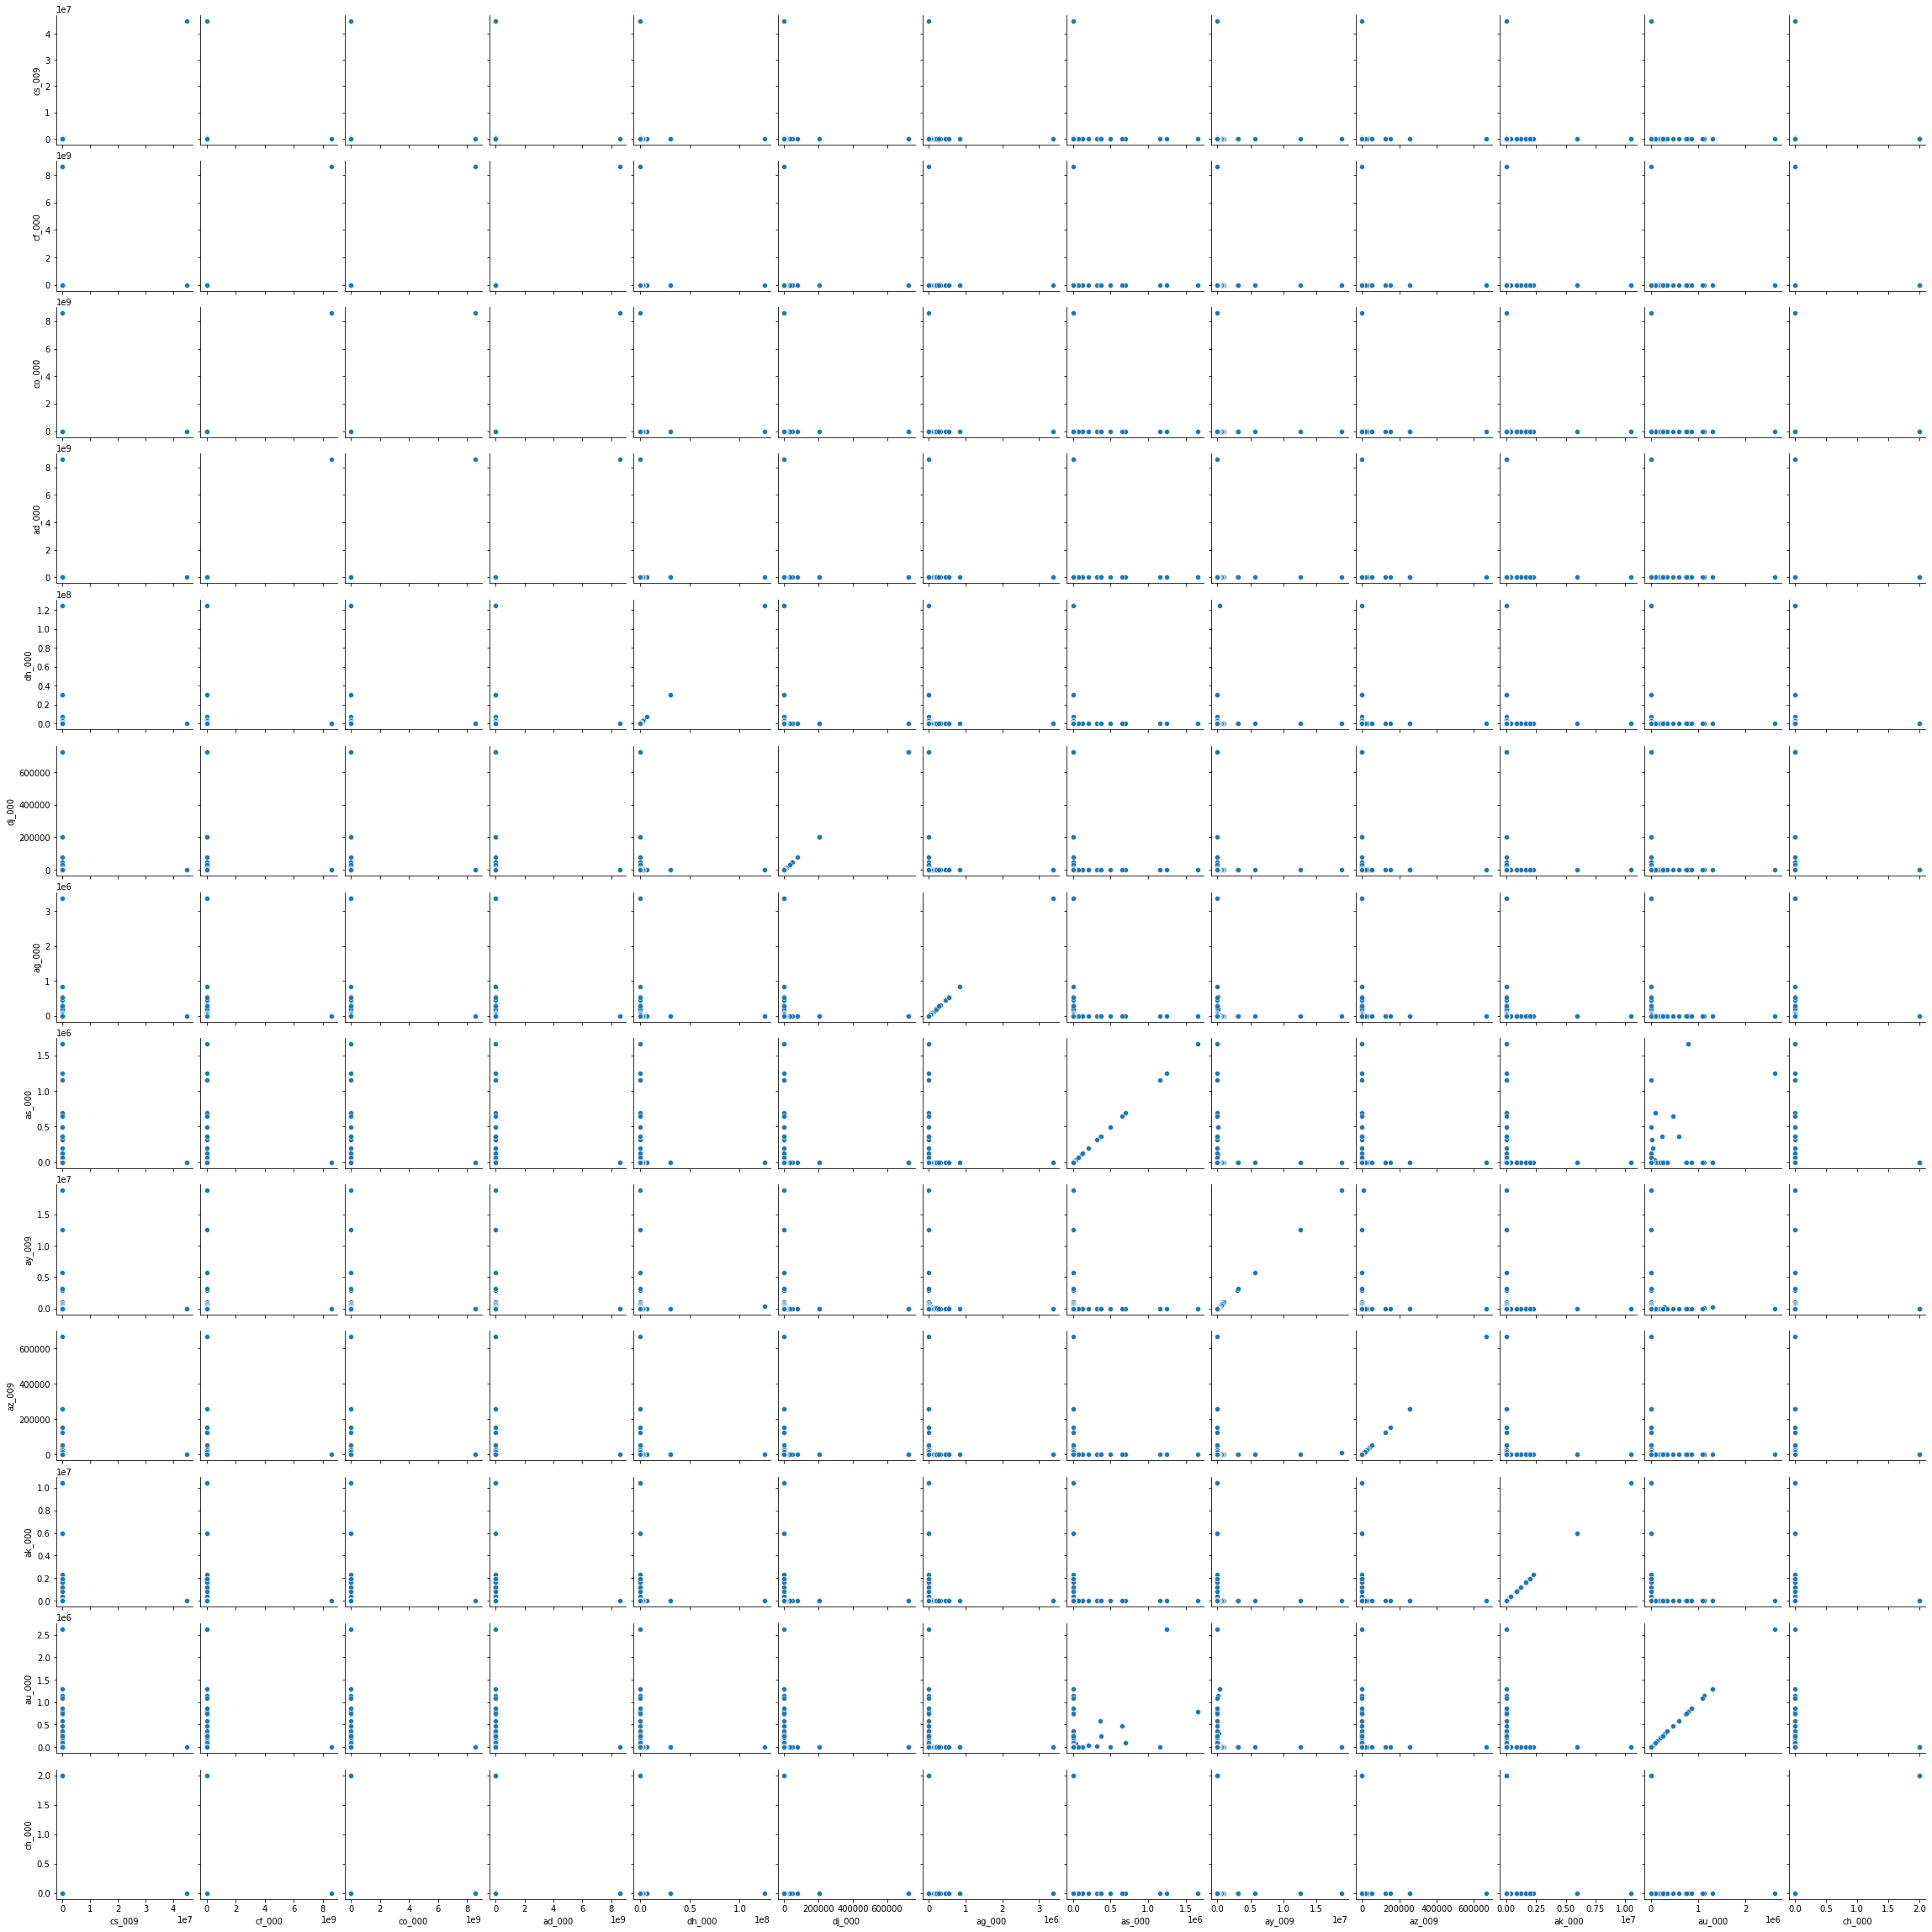

In [11]:
sns.pairplot(featureDF, diag_kind=None)

#### Can you draw conclusions about significance of those features, just by the scatter plots?

<b>Answer : </b>
Yes. Some features have a strong positive relationships between them.

##### box plot

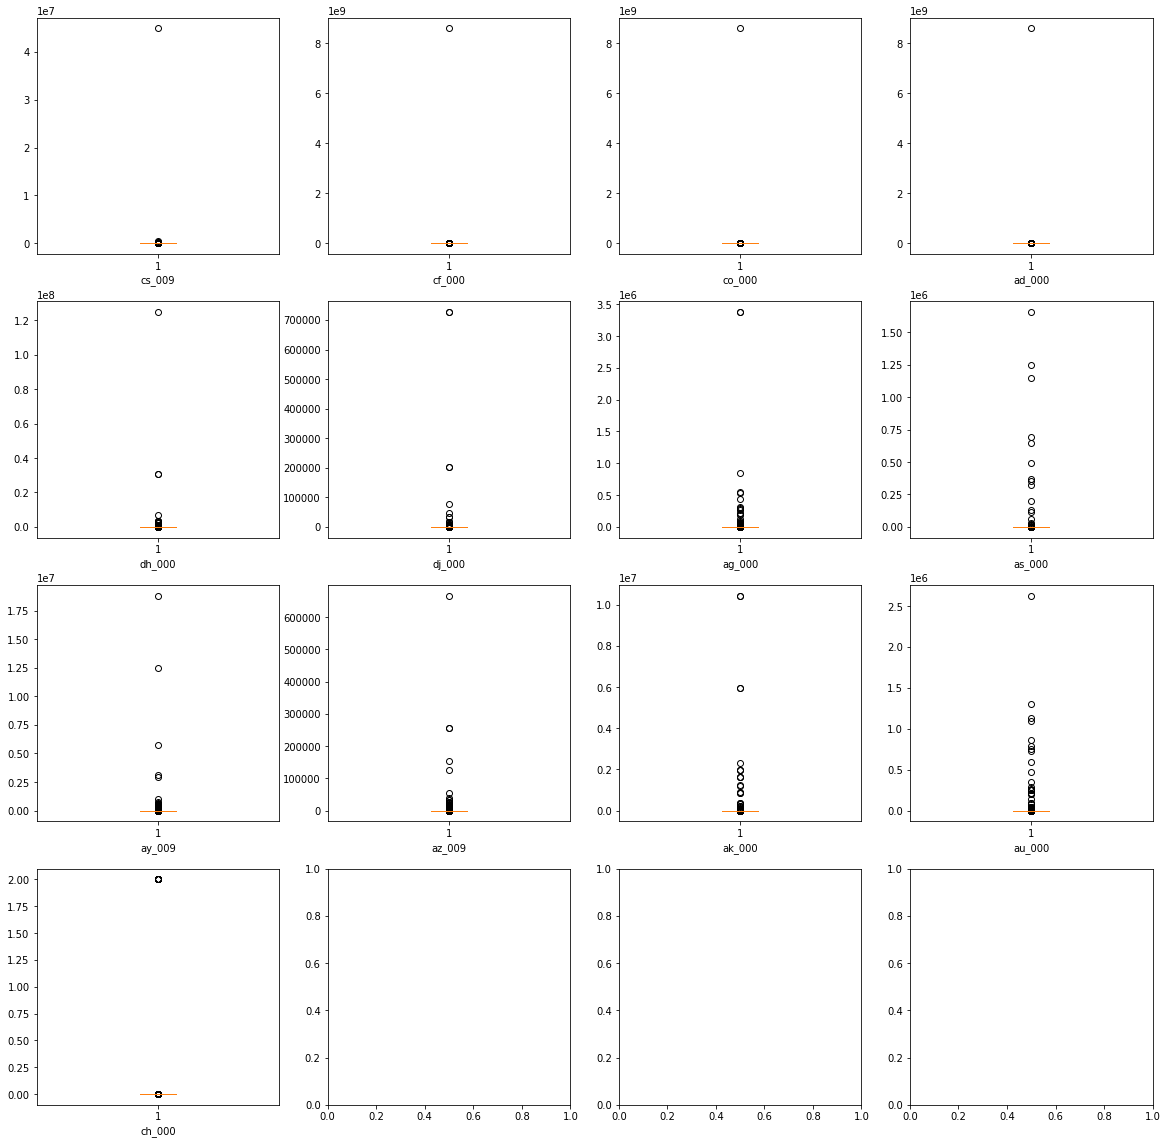

In [12]:
import math
i, j = 0, 0
PLOTS_PER_ROW = 4
fig, axs = plt.subplots(math.ceil(len(featureDF.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 20))
for col in featureDF.columns:
    axs[i][j].boxplot(featureDF[col])
    axs[i][j].set_xlabel(col)
    j+=1
    if j % PLOTS_PER_ROW==0:
        i += 1
        j = 0
plt.show()

#### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [13]:
train['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

<b>Answer : </b>
- There are only 1000 positive classes out of 60000 (the number of total training datasets). On the other hand, the training set has 59000 negative data. It means the training dataset is imbalanced.

### (c) Train a random forest to classify the data set. 
- Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them. Calculate Out of Bag error estimate for your random forset and compare it to the test error.

- The number of misclassification (error) = False positive value + False negative value
- Misclassification (error) rate = (False positive value + False negative value) / (Total number of samples)

########### REPORT for confusion matrix, ROC, AUC, and misclassification for training and test sets ###########
########### For Training Set
- Confusion matrix for training set: 
 [[58978    22]
 [  812   188]]
- Misclassification for training set = (FP+FN) = 834
- Misclassification rate for training set = (FP+FN)/(TN+FN+TP+FP) = 834/60000 = 0.014
- AUC score for training set: 0.972
- ROC curves for training set: 



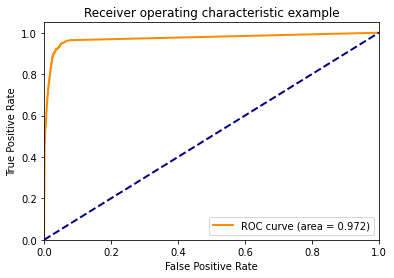

########### For Test Set
- Confusion matrix for test set: 
 [[15624     1]
 [  304    71]]
- Misclassification for test set = (FP+FN) = 305
- Misclassification rate for test set = (FP+FN)/(TN+FN+TP+FP) = 305/16000 =  0.019
- AUC score for test set: 0.981
- ROC curves for test set: 



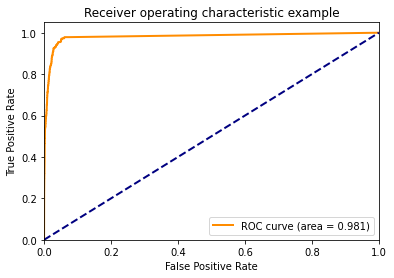



########### Out of Bag error estimate for your random forset
- Out of Bag error(oob_error) = 0.014


In [14]:
train_X = train.iloc[:,1:]
train_y = train.iloc[:,0]

test_X = test.iloc[:,1:]
test_y = test.iloc[:,0]


clf = RandomForestClassifier(max_depth=2, random_state=0, oob_score=True).fit(train_X, train_y)
predicted_train_y = clf.predict(train_X)
predicted_test_y = clf.predict(test_X)


################# For Training Set
print('########### REPORT for confusion matrix, ROC, AUC, and misclassification for training and test sets ###########')
print('########### For Training Set')

### Confusion matrix
train_cm = confusion_matrix(train_y, predicted_train_y)
print('- Confusion matrix for training set: \n', train_cm)

TN = train_cm[0][0]
FN = train_cm[1][0]
TP = train_cm[1][1]
FP = train_cm[0][1]
print('- Misclassification for training set = (FP+FN) = %d'%(FP+FN))
print('- Misclassification rate for training set = (FP+FN)/(TN+FN+TP+FP) = %d/%d = %.3f'%((FP+FN), (TN+FN+TP+FP), (FP+FN)/(TN+FN+TP+FP)))

### AUC
fpr, tpr, thresholds = roc_curve(train_y, clf.predict_proba(train_X)[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
print('- AUC score for training set: %.3f'%roc_auc)

### ROC
print('- ROC curves for training set: \n')
plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

print('########### For Test Set')
### Confusion matrix
test_cm = confusion_matrix(test_y, predicted_test_y)
print('- Confusion matrix for test set: \n', test_cm)

TN = test_cm[0][0]
FN = test_cm[1][0]
TP = test_cm[1][1]
FP = test_cm[0][1]
print('- Misclassification for test set = (FP+FN) = %d'%(FP+FN))
print('- Misclassification rate for test set = (FP+FN)/(TN+FN+TP+FP) = %d/%d =  %.3f'%((FP+FN), (TN+FN+TP+FP), (FP+FN)/(TN+FN+TP+FP)))

### AUC
fpr, tpr, thresholds = roc_curve(test_y, clf.predict_proba(test_X)[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
print('- AUC score for test set: %.3f'%roc_auc)

### ROC
print('- ROC curves for test set: \n')
plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

print()
print()

### Calculate Out of Bag error estimate for your random forset and compare it to the test error.
print('########### Out of Bag error estimate for your random forset')
oob_error = 1 - clf.oob_score_
print('- Out of Bag error(oob_error) = %.3f'%oob_error)



<b> Answer :</b>
- Out of Bag error is about 0.014. On the other hand, test error is about 0.019. Test error is more higher than OOB error.

### (d) Research how class imbalance is addressed in random forests. 
- Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

<b>Answer : </b>
There are two methods to address the imbalanced data wheb using the random forest model. One approach is cost-sensitive learning and the other is sampling.

1. Cost-sensitive approach : This approach would be to assign different weights to different classes. So if the minority class is assigned a higher weight and thus higher misclassification cost, then that can help reduce its biasness towards the majority class. You can use the class weight parameter of random forest in scikit-learn to assign weights to each class.
2. Sampling : There are various methods of sampling like oversampling the minority class or undersampling the majority class. Although these simple sampling methods improve the overall model performance, its preferable to go for a more specialized sampling method such as SMOTE and others to get a better model.

<B> How to address clas imbalance in this part?</B>
- In this part, I will apply the first approach. Therefore, the only difference between the above model and new model which addresses class imbalance is adding the code <code>'class_weight='balanced'</code>.

- Reference for class_weight parameter <br>
    - <code>class_weight{“balanced”, “balanced_subsample”}</code>, dict or list of dicts, default=None
        - Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. 
        - The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
        - The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

########### REPORT for confusion matrix, ROC, AUC, and misclassification for training and test sets ###########
########### For Training Set
- Confusion matrix for training set: 
 [[55203  3797]
 [   53   947]]
- Misclassification for training set = (FP+FN) = 3850
- Misclassification rate for training set = (FP+FN)/(TN+FN+TP+FP) = 3850/60000 = 0.064
- AUC score for training set: 0.977
- ROC curves for training set: 



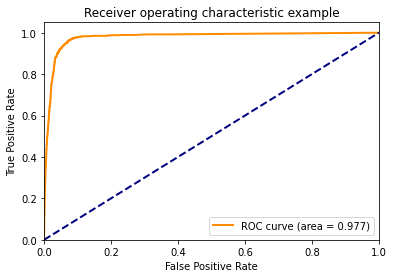

########### For Test Set
- Confusion matrix for test set: 
 [[14673   952]
 [   12   363]]
- Misclassification for test set = (FP+FN) = 964
- Misclassification rate for test set = (FP+FN)/(TN+FN+TP+FP) = 964/16000 =  0.060
- AUC score for test set: 0.983
- ROC curves for test set: 



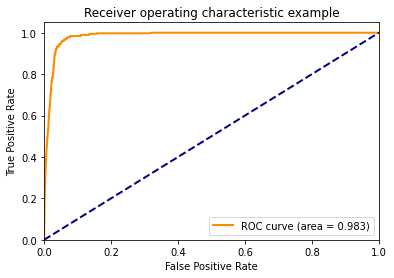



########### Out of Bag error estimate for your random forset
- Out of Bag error(oob_error) = 0.064


In [15]:
train_X = train.iloc[:,1:]
train_y = train.iloc[:,0]

test_X = test.iloc[:,1:]
test_y = test.iloc[:,0]


clf = RandomForestClassifier(max_depth=2, random_state=0, oob_score=True, class_weight='balanced').fit(train_X, train_y)
predicted_train_y = clf.predict(train_X)
predicted_test_y = clf.predict(test_X)


################# For Training Set
print('########### REPORT for confusion matrix, ROC, AUC, and misclassification for training and test sets ###########')
print('########### For Training Set')

### Confusion matrix
train_cm = confusion_matrix(train_y, predicted_train_y)
print('- Confusion matrix for training set: \n', train_cm)

TN = train_cm[0][0]
FN = train_cm[1][0]
TP = train_cm[1][1]
FP = train_cm[0][1]
print('- Misclassification for training set = (FP+FN) = %d'%(FP+FN))
print('- Misclassification rate for training set = (FP+FN)/(TN+FN+TP+FP) = %d/%d = %.3f'%((FP+FN), (TN+FN+TP+FP), (FP+FN)/(TN+FN+TP+FP)))

### AUC
fpr, tpr, thresholds = roc_curve(train_y, clf.predict_proba(train_X)[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
print('- AUC score for training set: %.3f'%roc_auc)

### ROC
print('- ROC curves for training set: \n')
plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

print('########### For Test Set')
### Confusion matrix
test_cm = confusion_matrix(test_y, predicted_test_y)
print('- Confusion matrix for test set: \n', test_cm)

TN = test_cm[0][0]
FN = test_cm[1][0]
TP = test_cm[1][1]
FP = test_cm[0][1]
print('- Misclassification for test set = (FP+FN) = %d'%(FP+FN))
print('- Misclassification rate for test set = (FP+FN)/(TN+FN+TP+FP) = %d/%d =  %.3f'%((FP+FN), (TN+FN+TP+FP), (FP+FN)/(TN+FN+TP+FP)))

### AUC
fpr, tpr, thresholds = roc_curve(test_y, clf.predict_proba(test_X)[:,1], pos_label='pos')
roc_auc = auc(fpr, tpr)
print('- AUC score for test set: %.3f'%roc_auc)

### ROC
print('- ROC curves for test set: \n')
plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

print()
print()

### Calculate Out of Bag error estimate for your random forset and compare it to the test error.
print('########### Out of Bag error estimate for your random forset')
oob_error = 1 - clf.oob_score_
print('- Out of Bag error(oob_error) = %.3f'%oob_error)


#### Compare the results with those of 1c.

<B> Answer : </B>
- Before handling class imbalance, OOB error is about 0.014 and the test error is about 0.019.
- After handling class imbalance, OOB error is about 0.064 and the test error is about 0.060.


- Random forests tend to be biased toward majority classes on extremely unbalanced datasets in general. For this reason, even though model fitted with unbalance datasets give us lower OOB and test error rates, we cannot say the model is a good classifier.


### (e) XGBoost and Model Trees
- In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has ΣjβjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.


- One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [16]:
className = {'neg':0, 'pos':1}
train_X, train_y = train.iloc[:,1:], train[['class']].replace({"class": className})
test_X, test_y = test.iloc[:,1:], test[['class']].replace({"class": className})
resultTable = []

In [17]:
def trainResult(train_X, train_y, pred_xgb_train):
    ################# For Training Set
    print('########### REPORT for confusion matrix, ROC, AUC, and misclassification for training and test sets ###########')
    print('########### For Training Set')

    ### Confusion matrix
    train_cm = confusion_matrix(train_y, pred_xgb_train)
    print('- Confusion matrix for training set: \n', train_cm)

    ### AUC
    fpr, tpr, thresholds = roc_curve(train_y, model_xgb.predict_proba(train_X)[:,1])
    roc_auc = auc(fpr, tpr)
    print('- AUC score for training set: %.3f'%roc_auc)

    ### ROC
    print('- ROC curves for training set: \n')
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.3f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

In [18]:
def testResult(test_X, test_y, pred_xgb_test):
    print('########### For Test Set')
    ### Confusion matrix
    test_cm = confusion_matrix(test_y, pred_xgb_test)
    print('- Confusion matrix for test set: \n', test_cm)

    ### AUC
    fpr, tpr, thresholds = roc_curve(test_y, model_xgb.predict_proba(test_X)[:,1])
    roc_auc = auc(fpr, tpr)
    print('- AUC score for test set: %.3f'%roc_auc)

    ### ROC
    print('- ROC curves for test set: \n')
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.3f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

##### 5 fold validation

In [20]:
print("Used cross-validation: %s ===== \n\n"%(5))
alphas = [1, 3, 5, 7, 10]
mse_l1 = []
for al in alphas:
    print('With alphas : %f ---- '%al)        
    cv = RepeatedKFold(n_splits=5)
    MSE = []
    for train_idx, valid_idx in cv.split(train_X):
        X_train, X_valid = train_X.loc[train_idx], train_X.loc[valid_idx]
        y_train, y_valid = train_y.loc[train_idx], train_y.loc[valid_idx]
        xgb = XGBClassifier(reg_alpha=al).fit(X_train, y_train.values.ravel())
        pred = xgb.predict(X_valid)
        mse = mean_squared_error(y_valid, pred)
        MSE.append(mse)
    mse_l1.append(np.mean(MSE))

result = list(zip(alphas, mse_l1))
dfL1 = pd.DataFrame(result, columns=['alphas', 'MSE'])
minIdx = dfL1['MSE'].idxmin()
minL1 = dfL1.iloc[minIdx,0]
print("Result of %d fold cross validation ======================== \n"%5)
print(dfL1)
print("In %d fold cross validation, when α(L1 Regularization Form) is '%0.3f', MSE score is lowest in training set" %(5, minL1))

Used cross-validation: 5 ===== 


With alphas : 1.000000 ---- 
With alphas : 3.000000 ---- 
With alphas : 5.000000 ---- 
With alphas : 7.000000 ---- 
With alphas : 10.000000 ---- 
Result of 5 fold cross validation ======================== 

   alphas       MSE
0       1  0.006658
1       3  0.006843
2       5  0.006877
3       7  0.007058
4      10  0.007253
In 5 fold cross validation, when α(L1 Regularization Form) is '1.000', MSE score is lowest in training set


#### Compare the train error with the test error.

In [21]:
model_xgb = XGBClassifier(alpha=minL1).fit(train_X, train_y.values.ravel())
pred_xgb_train = xgb.predict(train_X)
pred_xgb_test = xgb.predict(test_X)
mse_xgb_train = mean_squared_error(train_y, pred_xgb_train)
mse_xgb_test = mean_squared_error(test_y, pred_xgb_test)

print("When using the XGBoost to fit the model tree, train error rate is %f"%mse_xgb_train)
print("When using the XGBoost to fit the model tree, test error rate is %f"%mse_xgb_test)
resultTable.append(['5 fold CV', minL1, mse_xgb_train, mse_xgb_test])

When using the XGBoost to fit the model tree, train error rate is 0.005950
When using the XGBoost to fit the model tree, test error rate is 0.009562


5 fold cross validation ==================================

########### REPORT for confusion matrix, ROC, AUC, and misclassification for training and test sets ###########
########### For Training Set
- Confusion matrix for training set: 
 [[58938    62]
 [  295   705]]
- AUC score for training set: 0.995
- ROC curves for training set: 



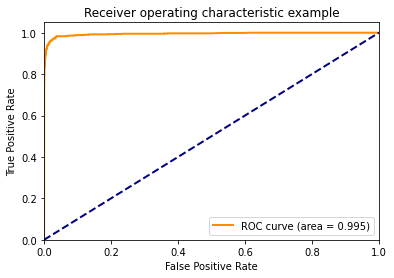

In [22]:
print("5 fold cross validation ==================================\n")
trainResult(train_X, train_y, pred_xgb_train)

########### For Test Set
- Confusion matrix for test set: 
 [[15602    23]
 [  130   245]]
- AUC score for test set: 0.995
- ROC curves for test set: 



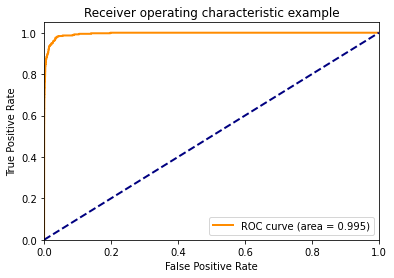

In [23]:
testResult(test_X, test_y, pred_xgb_test)

### (f) Use SMOTE (Synthetic Minority Over-sampling Technique)

- Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.


- Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

Used cross-validation: 5 ===== 


With alphas : 1.000000 ---- 
With alphas : 3.000000 ---- 
With alphas : 5.000000 ---- 
With alphas : 7.000000 ---- 
With alphas : 10.000000 ---- 
Result of 5 fold cross validation ======================== 

   alphas       MSE
0       1  0.019627
1       3  0.019031
2       5  0.019075
3       7  0.019611
4      10  0.018629
In 5 fold cross validation, when α(L1 Regularization Form) is '10.000', MSE score is lowest in training set
When using the XGBoost to fit the model tree, train error rate is 0.017650
When using the XGBoost to fit the model tree, test error rate is 0.018312
5 fold cross validation ==================================

########### REPORT for confusion matrix, ROC, AUC, and misclassification for training and test sets ###########
########### For Training Set
- Confusion matrix for training set: 
 [[58032   968]
 [   91   909]]
- AUC score for training set: 0.995
- ROC curves for training set: 



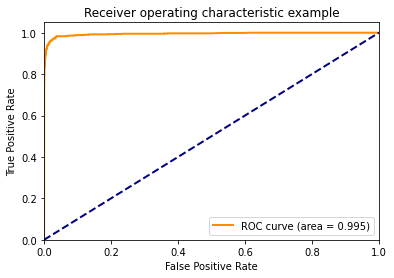

########### For Test Set
- Confusion matrix for test set: 
 [[15368   257]
 [   36   339]]
- AUC score for test set: 0.995
- ROC curves for test set: 



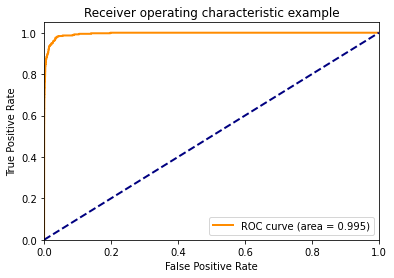

In [26]:
print("Used cross-validation: %s ===== \n\n"%(5))
alphas = [1, 3, 5, 7, 10]
mse_l1 = []
for al in alphas:
    print('With alphas : %f ---- '%al)        
    cv = RepeatedKFold(n_splits=5)
    MSE = []
    for train_idx, valid_idx in cv.split(train_X):
        X_train, X_valid = train_X.loc[train_idx], train_X.loc[valid_idx]
        y_train, y_valid = train_y.loc[train_idx], train_y.loc[valid_idx]

        # Using SMOTE
        sm = SMOTE(random_state=42)
        X_train, y_train = sm.fit_resample(X_train, y_train)
        X_valid, y_valid = sm.fit_resample(X_valid, y_valid)

        xgb = XGBClassifier(reg_alpha=al).fit(X_train, y_train.values.ravel())
        pred = xgb.predict(X_valid)
        mse = mean_squared_error(y_valid, pred)
        MSE.append(mse)
    mse_l1.append(np.mean(MSE))

result = list(zip(alphas, mse_l1))
dfL1 = pd.DataFrame(result, columns=['alphas', 'MSE'])
minIdx = dfL1['MSE'].idxmin()
minL1 = dfL1.iloc[minIdx,0]
print("Result of %d fold cross validation ======================== \n"%5)
print(dfL1)
print("In %d fold cross validation, when α(L1 Regularization Form) is '%0.3f', MSE score is lowest in training set" %(5, minL1))

model_xgb = XGBClassifier(alpha=minL1).fit(train_X, train_y.values.ravel())
pred_xgb_train = xgb.predict(train_X)
pred_xgb_test = xgb.predict(test_X)
mse_xgb_train = mean_squared_error(train_y, pred_xgb_train)
mse_xgb_test = mean_squared_error(test_y, pred_xgb_test)

print("When using the XGBoost to fit the model tree, train error rate is %f"%mse_xgb_train)
print("When using the XGBoost to fit the model tree, test error rate is %f"%mse_xgb_test)
resultTable.append(['5 fold CV', minL1, mse_xgb_train, mse_xgb_test])

print("5 fold cross validation ==================================\n")
trainResult(train_X, train_y, pred_xgb_train)

testResult(test_X, test_y, pred_xgb_test)

#### Compare the uncompensated case with SMOTE case.

<B> Without SMOTE </B>
- In 5 fold cross validation, when α(L1 Regularization Form) is '1.000', MSE score is lowest in training set
- When using the XGBoost to fit the model tree, train error rate is 0.005950
- When using the XGBoost to fit the model tree, test error rate is 0.009562

<pre>
- Confusion matrix for training set: 
 [[58938    62]
 [  295   705]]
- AUC score for training set: 0.995

- Confusion matrix for test set: 
 [[15602    23]
 [  130   245]]
- AUC score for test set: 0.995
</pre>

<B> With SMOTE </B>
- In 5 fold cross validation, when α(L1 Regularization Form) is '10.000', MSE score is lowest in training set
- When using the XGBoost to fit the model tree, train error rate is 0.017650
- When using the XGBoost to fit the model tree, test error rate is 0.018312

<pre>
- Confusion matrix for training set: 
 [[58032   968]
 [   91   909]]
- AUC score for training set: 0.995

- Confusion matrix for test set: 
 [[15368   257]
 [   36   339]]
- AUC score for test set: 0.995
</pre>

<b>Answer : </b>
Comparing the results, the training and test errors with the model without SMOTE are relatively lower than the model with SMOTE. The reason is that most data points of the minority class are generally classified into the majority class, which leads the high accuracy. But, high accuracy does not mean a good model. This is because predicting the minority class is the main task rather than the majority class in the real world.

Also, even if the error rate of the model with SMOTE  is slightly low, it cannot be said that its performance is poor because both models with and without SMOTE have the same AUC score.

Moreover, we can see the important point when looking over the cross-validation’s false positive values. After using SMOTE, the prediction accuracy of the minority class become higher, which means that the model with SMOTE predicts the minority class better.

To sum up, when predicting the minority is more important, it is necessary to resolve class imbalance before fitting the model.

### Reference
- confusion matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- Leave-One-Out : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html
- SMOTE : https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
- XGBOOST : https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

## 2. ISLR 6.6.3

<img src='./../data/ISLR/ISLR-6-6-3.png'>

## 3. ISLR, 6.6.5

<img src='./../data/ISLR/ISLR-6-6-5.png'>

## 4. ISLR 8.4.5

<img src='./../data/ISLR/ISLR-8-4-5.png'>

## 5. ISLR 9.7.3

<img src='./../data/ISLR/ISLR-9-7-3.png'>